# Exemplary workflow of CIDER

ChemIcal DatasEt comparatoR (CIDER) primarily utilizes RDKit to compare two or more chemical structure datasets (SD files) in different aspects, e.g. size, overlap, molecular descriptor distributions, chemical space clustering, etc., most of which can be visually inspected.  
This notebook is an example of how you can use CIDER and what the different parameters of the functions do.  
For more details on the individual methods and their handling, please refer to the documentation.

## Setup  
The first step when using CIDER is to import CIDER and define a suitable name for calling.

In [1]:
from CIDER import ChemicalDatasetComparator
cider = ChemicalDatasetComparator()

/Users/kohulanrajan/opt/anaconda3/envs/cider_chem/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Class variables  
In CIDER there are some class variables that determine the names of the keys generated by the methods. Those keys are important to know for calling the values for inspection and after running a method CIDER will tell the name of the created keys.  
The class variables have predefined values but can be changed. Following are the class variables with their predefined values and the function that generates the key.

In [2]:
cider.import_keyname = "SDMolSupplier_Object" # cider.import_as_data_dict: 

cider.dataset_length_keyname = "number_of_molecules" # cider.get_number_of_molecules

cider.mol_grid_keyname = "molecule_picture" # cider.draw_molecules

cider.database_id_keyname = "coconut_id" # cider.get_database_id

cider.identifier_keyname = "identifier_list" # cider.get_identifier_list_key

cider.duplicates_keyname = "number_of_duplicates" # cider.get_duplicate_key
cider.duplicates_id_keyname = "duplicates" # cider.get_duplicate_key

cider.shared_mols_keyname = "number_of_shared_molecules" # cider.get_shared_molecules_key
cider.shared_mols_id_keyname = "shared_molecules" # cider.get_shared_molecules_key

cider.lipinski_list_keyname = "number_of_broken_Lipinski_Rules" # cider.get_lipinski_key
cider.lipinski_summary_keyname = "Lipinski_Rule_of_5_summary" # cider.get_lipinski_key

## Data import  and inspection
The second step is to choose the datasets you want to compare and import them as SDFiles. Here an three exemplary datasets are used. The phenole and the chlorbenzene set each contain the first 100 search hits from the COCONUT database for the query phenole or chlorbenzene respectively. The chlorbenzene-5 set contains half of the molecules from the chlorbenzene set.    
When using the import function, there will be a dictionary created which content will be updated with every subsequent function used. This main dictionary contains a sub-dictionary for every SDFile named after the SDFile name.  
When importing the SDFiles very molecule in the files will be parsed once to check for faulty molecules. When there are faulty molecules there is the option to set the parameter 'delete=True'. In this case the faulty molecules will be deleted from the working SDMolSUpplier Objects but they will remain in the original SDFiles.  
To make sure there will be no errors due to faulty molecules make sure to set 'delete=True' (default is False).

In [3]:
testdict = cider.import_as_data_dict('data')

INFO:root:No faulty molecules found in set_phenole.sdf
INFO:root:No faulty molecules found in set_chlorbenzene.sdf
INFO:root:No faulty molecules found in set_chlorbenzene-5.sdf
INFO:root:Created dictionary with keys: ['set_phenole.sdf', 'set_chlorbenzene.sdf', 'set_chlorbenzene-5.sdf', 'figures']


The main dictionary contains the names of the SDFiles as keys.  
The sub-dictionaries should always have the same keys, but the values of those keys can be different. As here shown, all sub-dictionaries have the 'SDMolSupplier_Object' key. The values for this key are the imported SDFiles.

In [4]:
testdict

{'set_phenole.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x107fbdd50>},
 'set_chlorbenzene.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x28e1f3880>},
 'set_chlorbenzene-5.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x28e1f3740>},
 'figures': {}}

## Overview dataset size  
To get an overview of the size of the datasets, the number of molecules in every dataset can be determined.  
The number will be displayed in line and will also be included as a new key in every sub-dictionary called 'number_of_molecules'.

In [5]:
cider.get_number_of_molecules(testdict)

INFO:root:Number of molecules in set_phenole.sdf: 100
INFO:root:Number of molecules in set_chlorbenzene.sdf: 100
INFO:root:Number of molecules in set_chlorbenzene-5.sdf: 50
INFO:root:Updated dictionary with 'number_of_molecules'


Now all the sub-dictionaries are updated with the key 'number_of_molecules' and the number of molecules can be accessed by this new key.

In [6]:
print(testdict['set_phenole.sdf'].keys())
print('Number of molecules in phenole set: ' + str(testdict['set_phenole.sdf']['number_of_molecules']))

dict_keys(['SDMolSupplier_Object', 'number_of_molecules'])
Number of molecules in phenole set: 100


## Overview molecules (visualization of molecules)  
To get a visual overview over the molecules in the different datasets, a part of the molecules can be plotted in a grid image.  
The number of plotted molecules and the number of molecules in one row can be specified, as well as the image size (with regard to the single molecule image). Here the first 20 molecules are displayed.  
The image will be displayed in line and exported to the output folder. CIDER creates the output folder itself in the same directory where the original data is stored.

INFO:root:Updated dictionary with 'mol_grid'


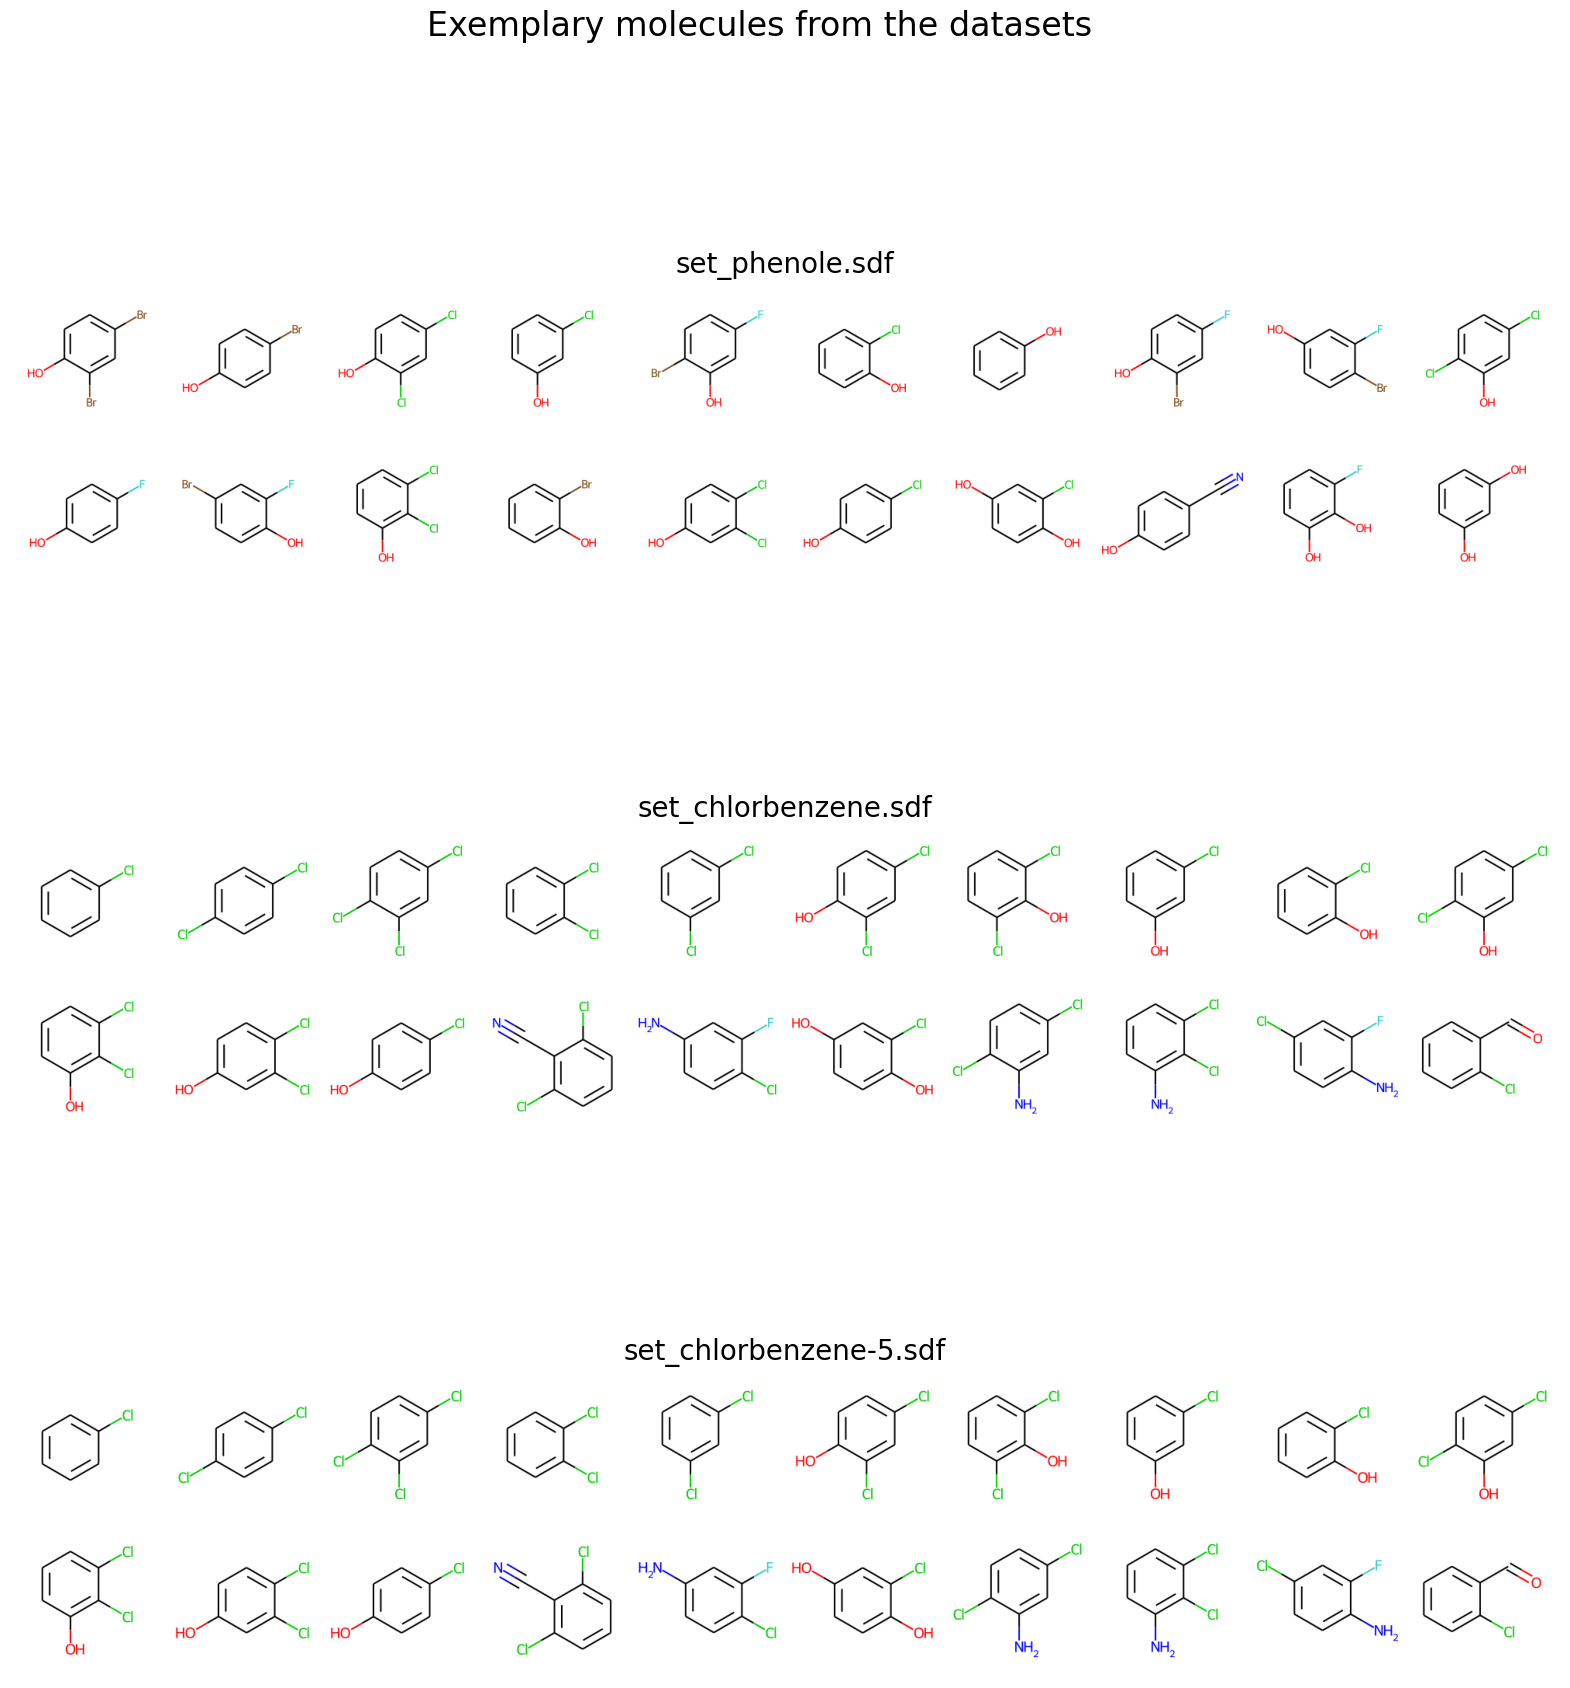

In [7]:
cider.draw_molecules(testdict, number_of_mols = 20, mols_per_row = 10)

## Get  Database ID  
When working with SDFiles exported from a database, it could be helpful to add the database ID for every molecule to the dictionary. For doing so, it is necessary to know how the ID is named in the SDFiles.

In [8]:
cider.get_database_id(testdict, 'coconut_id')

INFO:root:Updated dictionary with 'coconut_id'


Again, after running the function all the sub-dictionaries are updated with a new key 'coconut_id' and can be accessed with this. When there is no database ID found there will be None in the list.   
(Remember: If not using the COCONUT database ID, the key name (a class variable) can be changed according to the database ID used.)

In [9]:
print(testdict['set_chlorbenzene.sdf'].keys())
print('First COCONUT IDs for chlorbenzene set: ' + str(testdict['set_chlorbenzene.sdf']['coconut_id'][:5]))

dict_keys(['SDMolSupplier_Object', 'number_of_molecules', 'coconut_id'])
First COCONUT IDs for chlorbenzene set: ['CNP0009107', 'CNP0341270', 'CNP0206286', 'CNP0284887', 'CNP0080171']


## Get Chemical Identifier  
For the subsequent comparison, the molecules need a string representation as a chemical identifier. SMILES, InChI or InChIKey strings can be used here.  
Please note that a lot of methods from CIDER cannot be used if the chemical identifiers are missing. So remember to run the 'get_identifier_list_key' method before calling for any other comparison methods.

In [10]:
cider.get_identifier_list_key(testdict, 'smiles')

INFO:root:Updated dictionary with 'identifier_list'


As before all sub-dictionaries are now containing the new key 'identifier_list' and those lists can be accessed. 

In [11]:
print(testdict['set_chlorbenzene-5.sdf'].keys())
print('First SMILES strings for chlorbenzene-5 set: ' + str(testdict['set_chlorbenzene-5.sdf']['identifier_list'][:5]))

dict_keys(['SDMolSupplier_Object', 'number_of_molecules', 'coconut_id', 'identifier_list'])
First SMILES strings for chlorbenzene-5 set: ['Clc1ccccc1', 'Clc1ccc(Cl)cc1', 'Clc1ccc(Cl)c(Cl)c1', 'Clc1ccccc1Cl', 'Clc1cccc(Cl)c1']


## Testing for duplicates  
Before further comparison between the datasets, it might be important to know if there are any duplicates in a single dataset and get the identifier for those duplicates.  
(Short reminder: This method cannot be used unless the 'get_identifier_list_key' method is run previously!)

In [12]:
cider.get_duplicate_key(testdict)

INFO:root:Number of duplicates in set_phenole.sdf: 2, duplicate identifier(s): {'O=Cc1ccccc1O', 'O=Cc1ccc(O)cc1'}
INFO:root:Number of duplicates in set_chlorbenzene.sdf: 0, duplicate identifier(s): set()
INFO:root:Number of duplicates in set_chlorbenzene-5.sdf: 0, duplicate identifier(s): set()
INFO:root:Updated dictionary with 'number_of_duplicates' and 'coconut_id'


In the established way the new keys in the sub-dictionaries can be accessed.

In [13]:
print('There are ' + str(testdict['set_phenole.sdf']['number_of_duplicates']) + ' duplicates in the phenole set.')
print('SMILES strings for the duplicates: ' + str(testdict['set_phenole.sdf']['duplicates']) )

There are 2 duplicates in the phenole set.
SMILES strings for the duplicates: {'O=Cc1ccccc1O', 'O=Cc1ccc(O)cc1'}


## Comparison of molecules and visualization  
There might be molecules that are present in all the compared datasets. The number of these molecules and their identifier string can be extracted.  
Additionally, this intersection between the datasets can be visualized in a Venn diagram. The image will be displayed in line, and it will also be exported to the output folder. As mentioned before the chlorbenzene-5 set contains only molecules from the bigger chlorbenzene set and therefore there is a complete overlap between these two. 

In [14]:
cider.get_shared_molecules_key(testdict)

INFO:root:Number of molecules found in all datasets: 10, identifier(s): {'O=[N+]([O-])c1ccc(O)c(Cl)c1', 'Oc1cc(Cl)ccc1Cl', 'Oc1ccc(O)c(Cl)c1', 'Oc1cccc(Cl)c1', 'Oc1ccc(Cl)cc1Cl', 'Oc1ccccc1Cl', 'Oc1ccc(Cl)c(Cl)c1', 'Oc1cccc(Cl)c1Cl', 'O=[N+]([O-])c1cc(Cl)ccc1O', 'Oc1ccc(Cl)cc1'}
INFO:root:Updated dictionary with 'number_of_shared_molecules' and 'shared_molecules'


INFO:root:Updated dictionary with 'intersection'


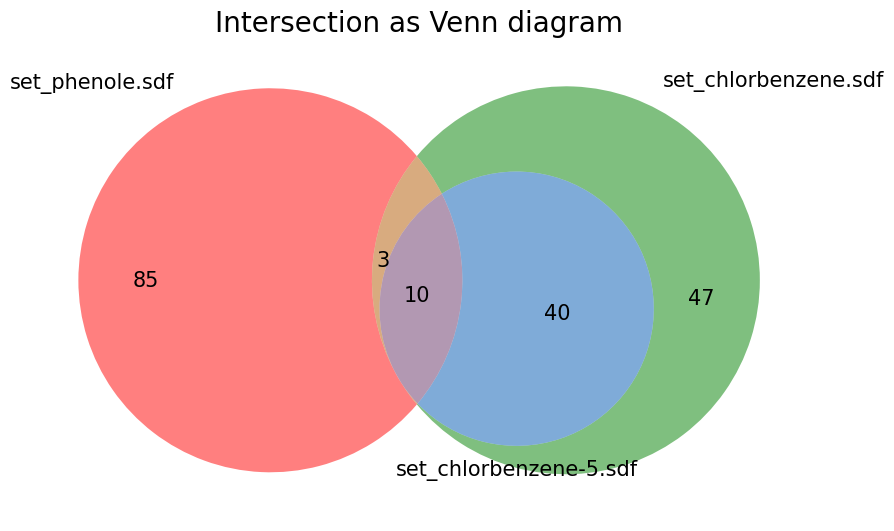

In [15]:
cider.visualize_intersection(testdict)

## Get Descriptor  
Besides the identity of the molecules, there are different descriptors to describe a molecule that can be compared. RDKit already has methods for calculating a lot of different descriptor values for molecules. After importing the RDKit methods, they can be called in CIDER and used to get the descriptor values for the molecules in the dataset.  
Other methods for calculating descriptor values might also work in CIDER after importing them, as long as they work on SDMolSupplier Objects.  
The name for the key under which the descriptor values are saved in the dictionary needs to be chosen.  
Following, there are examples of descriptors from RDKit run in the CIDER workflow.

In [16]:
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

In [17]:
cider.get_descriptor_list_key(testdict, Descriptors.MolWt, 'Molecular Weight')

INFO:root:Updated dictionary with 'Molecular Weight'


In [18]:
cider.get_descriptor_list_key(testdict, rdMolDescriptors.CalcMolFormula, 'Molecular Formula')

INFO:root:Updated dictionary with 'Molecular Formula'


In [19]:
cider.get_descriptor_list_key(testdict, Descriptors.NumHDonors, 'Number of H-Donors')

INFO:root:Updated dictionary with 'Number of H-Donors'


In [20]:
cider.get_descriptor_list_key(testdict, Descriptors.RingCount, 'Number of Rings')

INFO:root:Updated dictionary with 'Number of Rings'


In the cell below there are some more examples for descriptors that could be calculated.

In [21]:
# cider.get_descriptor_list_key(testdict, Descriptors.NumHDonors, 'Number of H-Donors')
# cider.get_descriptor_list_key(testdict, Descriptors.RingCount, 'Number of Rings')
# cider.get_descriptor_list_key(testdict, Descriptors.NumHAcceptors, 'Number of H-Acceptors')
# cider.get_descriptor_list_key(testdict, Descriptors.Chi1, 'Chi Connectivity Indices')
# cider.get_descriptor_list_key(testdict, Descriptors.Kappa1, 'Kappa Shape Indices')

Taking a look at the sub-dictionary keys the calculated descriptor values can be found there as new keys.

In [22]:
print(testdict['set_phenole.sdf'].keys())

dict_keys(['SDMolSupplier_Object', 'number_of_molecules', 'coconut_id', 'identifier_list', 'number_of_duplicates', 'duplicates', 'number_of_shared_molecules', 'shared_molecules', 'Molecular Weight', 'Molecular Formula', 'Number of H-Donors', 'Number of Rings'])


## Get descriptor value with database ID  
Using the database ID from a molecule it is possible to search in the dataset for a descriptor value for this molecule. Not only the descriptor value will be returned but also the sub-dictionary where the molecule was found.

In [23]:
def get_value_from_id(
    all_dicts: dict, wanted_id: str, descriptor_list_keyname: str
):
    """
    This function returns a descriptor value for a specific molecule referred to by its database ID and
    the dataset where the molecule has been found.

    Args:
        all_dicts (dict): dictionary of dictionaries with database_id_keyname and descriptor_list_keyname
        wanted_id (str): Database ID for the molecule of interest.
        descriptor_list_keyname (str): Descriptor value of interest.

    Returns:
        Print: Descriptor value and dataset where the molecule is found.

    """
    for single_dict in all_dicts:
        if single_dict == cider.figure_dict_keyname:
                continue
        if wanted_id in all_dicts[single_dict][cider.database_id_keyname]:
            print("Molecule found in " + str(single_dict))
            index = all_dicts[single_dict][cider.database_id_keyname].index(
                wanted_id
            )
            descriptor_value = all_dicts[single_dict][descriptor_list_keyname][
                index
            ]
            print(
                str(descriptor_list_keyname)
                + " value for ID "
                + str(wanted_id)
                + ": "
                + str(descriptor_value)
            )
        else:
            print("Molecule not found in " + str(single_dict))
    return

In [24]:
get_value_from_id(testdict, 'CNP0291002', 'Molecular Weight')

Molecule found in set_phenole.sdf
Molecular Weight value for ID CNP0291002: 173.55499999999998
Molecule found in set_chlorbenzene.sdf
Molecular Weight value for ID CNP0291002: 173.55499999999998
Molecule found in set_chlorbenzene-5.sdf
Molecular Weight value for ID CNP0291002: 173.55499999999998


## Descriptor binning and visualization  
As long as the descriptor values are integers or float numbers, the values can be plotted for a visual comparison. Descriptor values like the molecular formula can not be plotted.  
For continuous values such as the molecular weight, the interval size for the binning of the descriptor values can be chosen. If there is an interval size (width_of_bins) given for a discrete descriptor, it will be ignored. 
The values used for plotting (intervals and number of molecules from each dataset per interval) will usually be exported into the output folder as csv files. This can be suppressed by changing 'save_dataframe' to False.  
Please note that only descriptors can be plotted that have been calculated before.

INFO:root:Updated the dictionary with 'binned_Molecular Weight'
INFO:root:Updated dictionary with 'distribution_of_Molecular Weight'


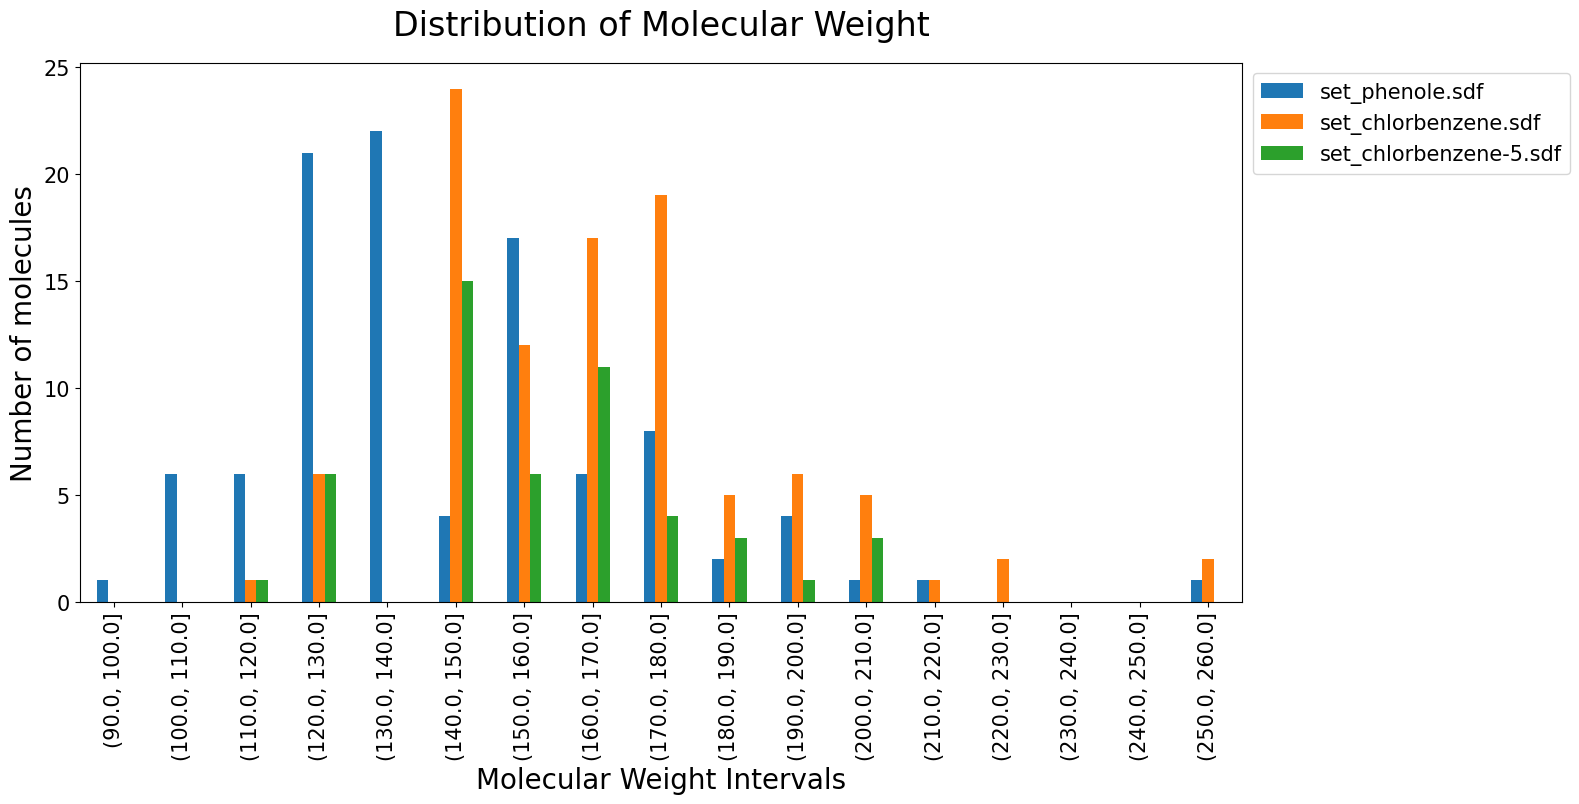

In [25]:
cider.descriptor_counts_and_plot(testdict, 'Molecular Weight', width_of_bins = 10)

The number of rings is a discrete descriptor and a given interval size will be ignored. The plotting values will not be exported due to the parameter 'save_dataframe=False'.

INFO:root:Updated the dictionary with 'binned_Number of Rings'
INFO:root:Updated dictionary with 'distribution_of_Number of Rings'


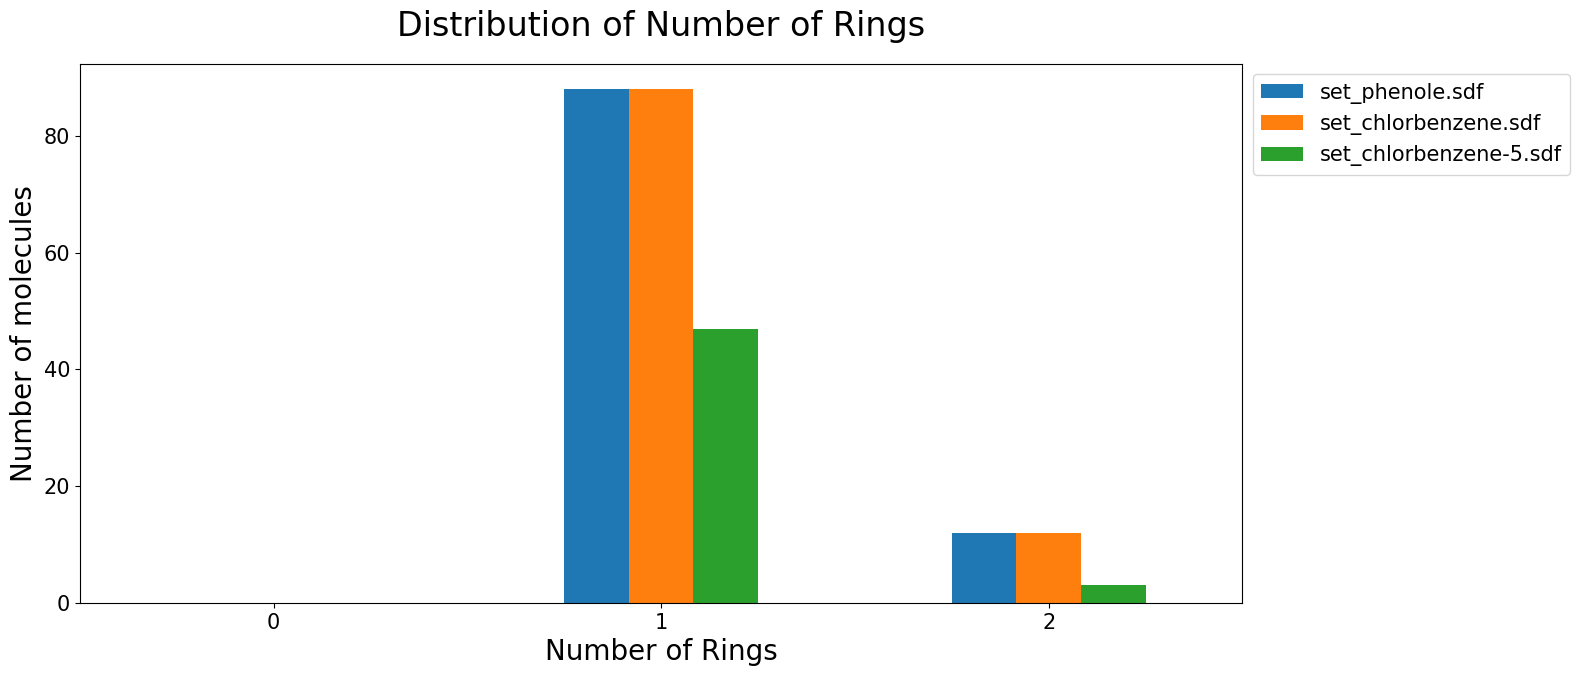

In [26]:
cider.descriptor_counts_and_plot(testdict, 'Number of Rings', width_of_bins = 10, save_dataframe=False)

## Lipinski Rules of 5 with visualization  
The Lipinski Rules of 5 include more than one descriptor. CIDER can check all the single descriptors of the Lipinski Rules and get the number of broken rules for every molecule. There will also be a summary for every dataset, how the molecules are distributed.

In [27]:
cider.get_lipinski_key(testdict)

INFO:root:Updated dictionary with 'number_of_broken_Lipinski_Rules' and 'Lipinski_Rule_of_5_summary'


The distribution of the molecules in the datasets for the Lipinski Rules can be plotted comparable to the descriptor plots.  
Here all the molecules are relatively small and do not break any Lipinski rule.

INFO:root:Updated dictionary with 'lipinski_plot'


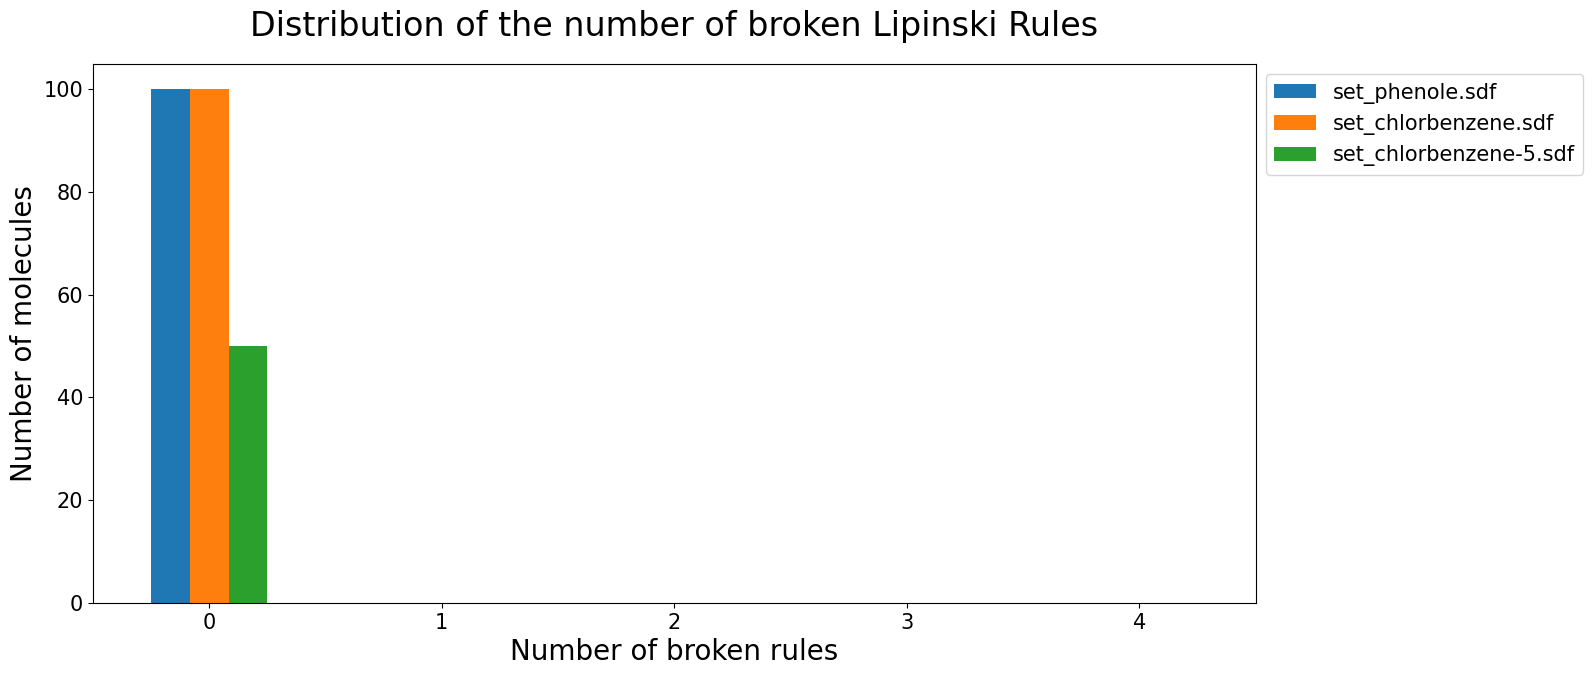

In [28]:
cider.lipinski_plot(testdict)

## Scaffold analysis  
CIDER can get the scaffold (all rings, linkers and terminal atoms with a double bound), the framework (only rings and linkers) or the cyclic carbon skeleton (all atoms and bonds replaced with carbon and single bonds) for every molecule. The absolute or relative frequency of the different scaffolds, frameworks or skeletons is calculated for every dataset and summarized. A chosen number of the most frequent scaffolds, frameworks or skeletons is plotted.  
The default is to use scaffolds.

INFO:root:Updated dictionary with 'scaffold_list' and 'scaffold_summary'
INFO:root:Updated dictionary with 'scaffold_grid'


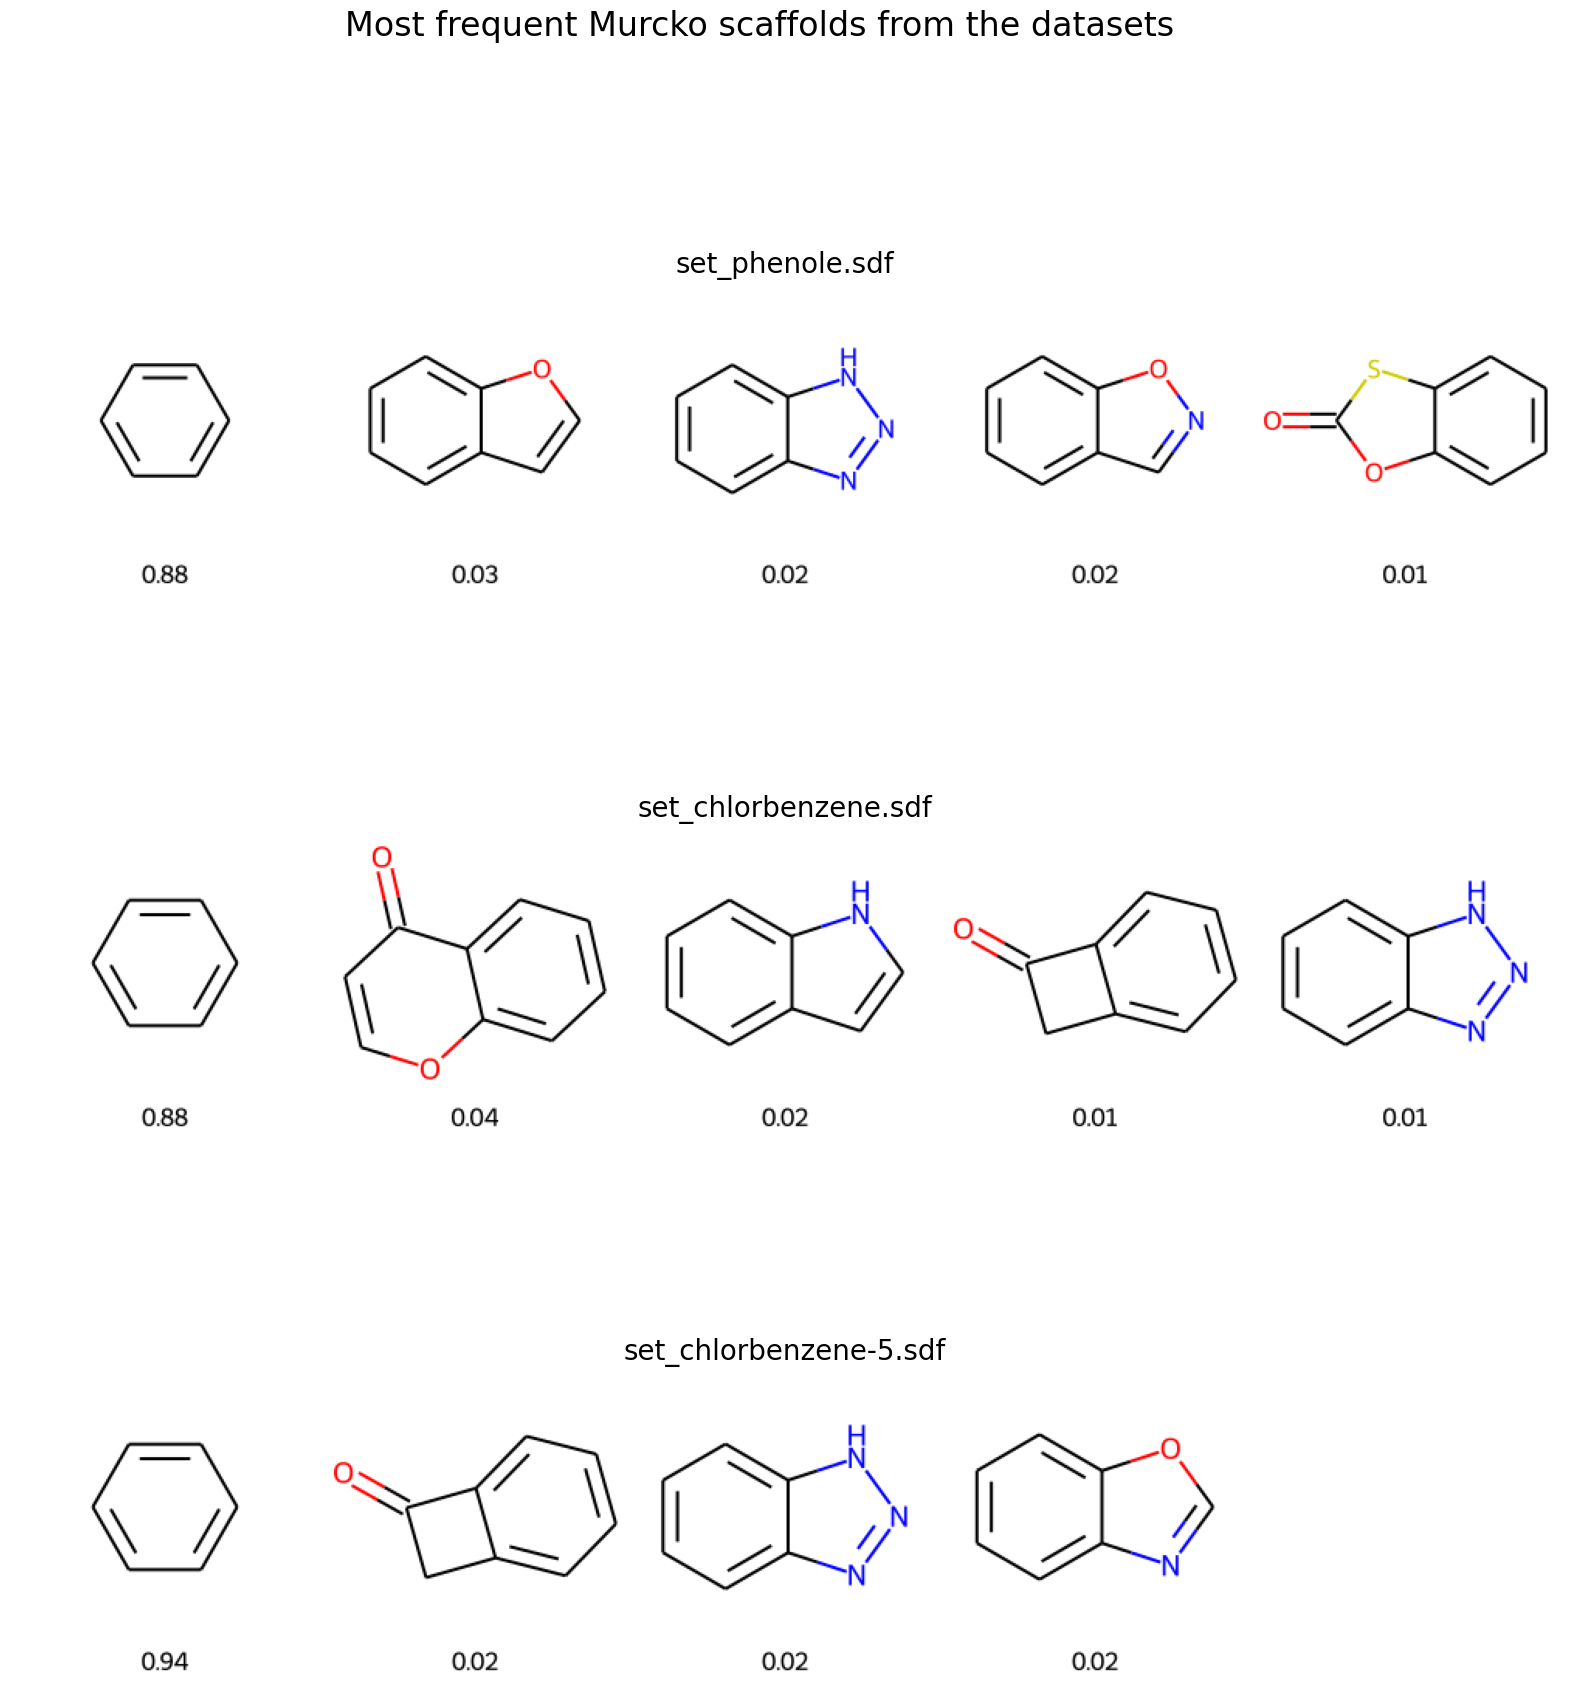

In [29]:
cider.draw_most_frequent_scaffolds(testdict)

Under the key 'scaffold_list' the scaffold (framework, skeleton) for every molecules is listed as SMILES string. And the 'scaffold_summary' contains the (relative or absolute) frequency for the scaffolds (frameworks, skeletons) in the single datasets.  
When setting the parameter 'normalize=False' the absolute frequency for the scaffolds (frameworks, skeletons) is used. 

INFO:root:Updated dictionary with 'scaffold_list' and 'scaffold_summary'
INFO:root:Updated dictionary with 'scaffold_grid'


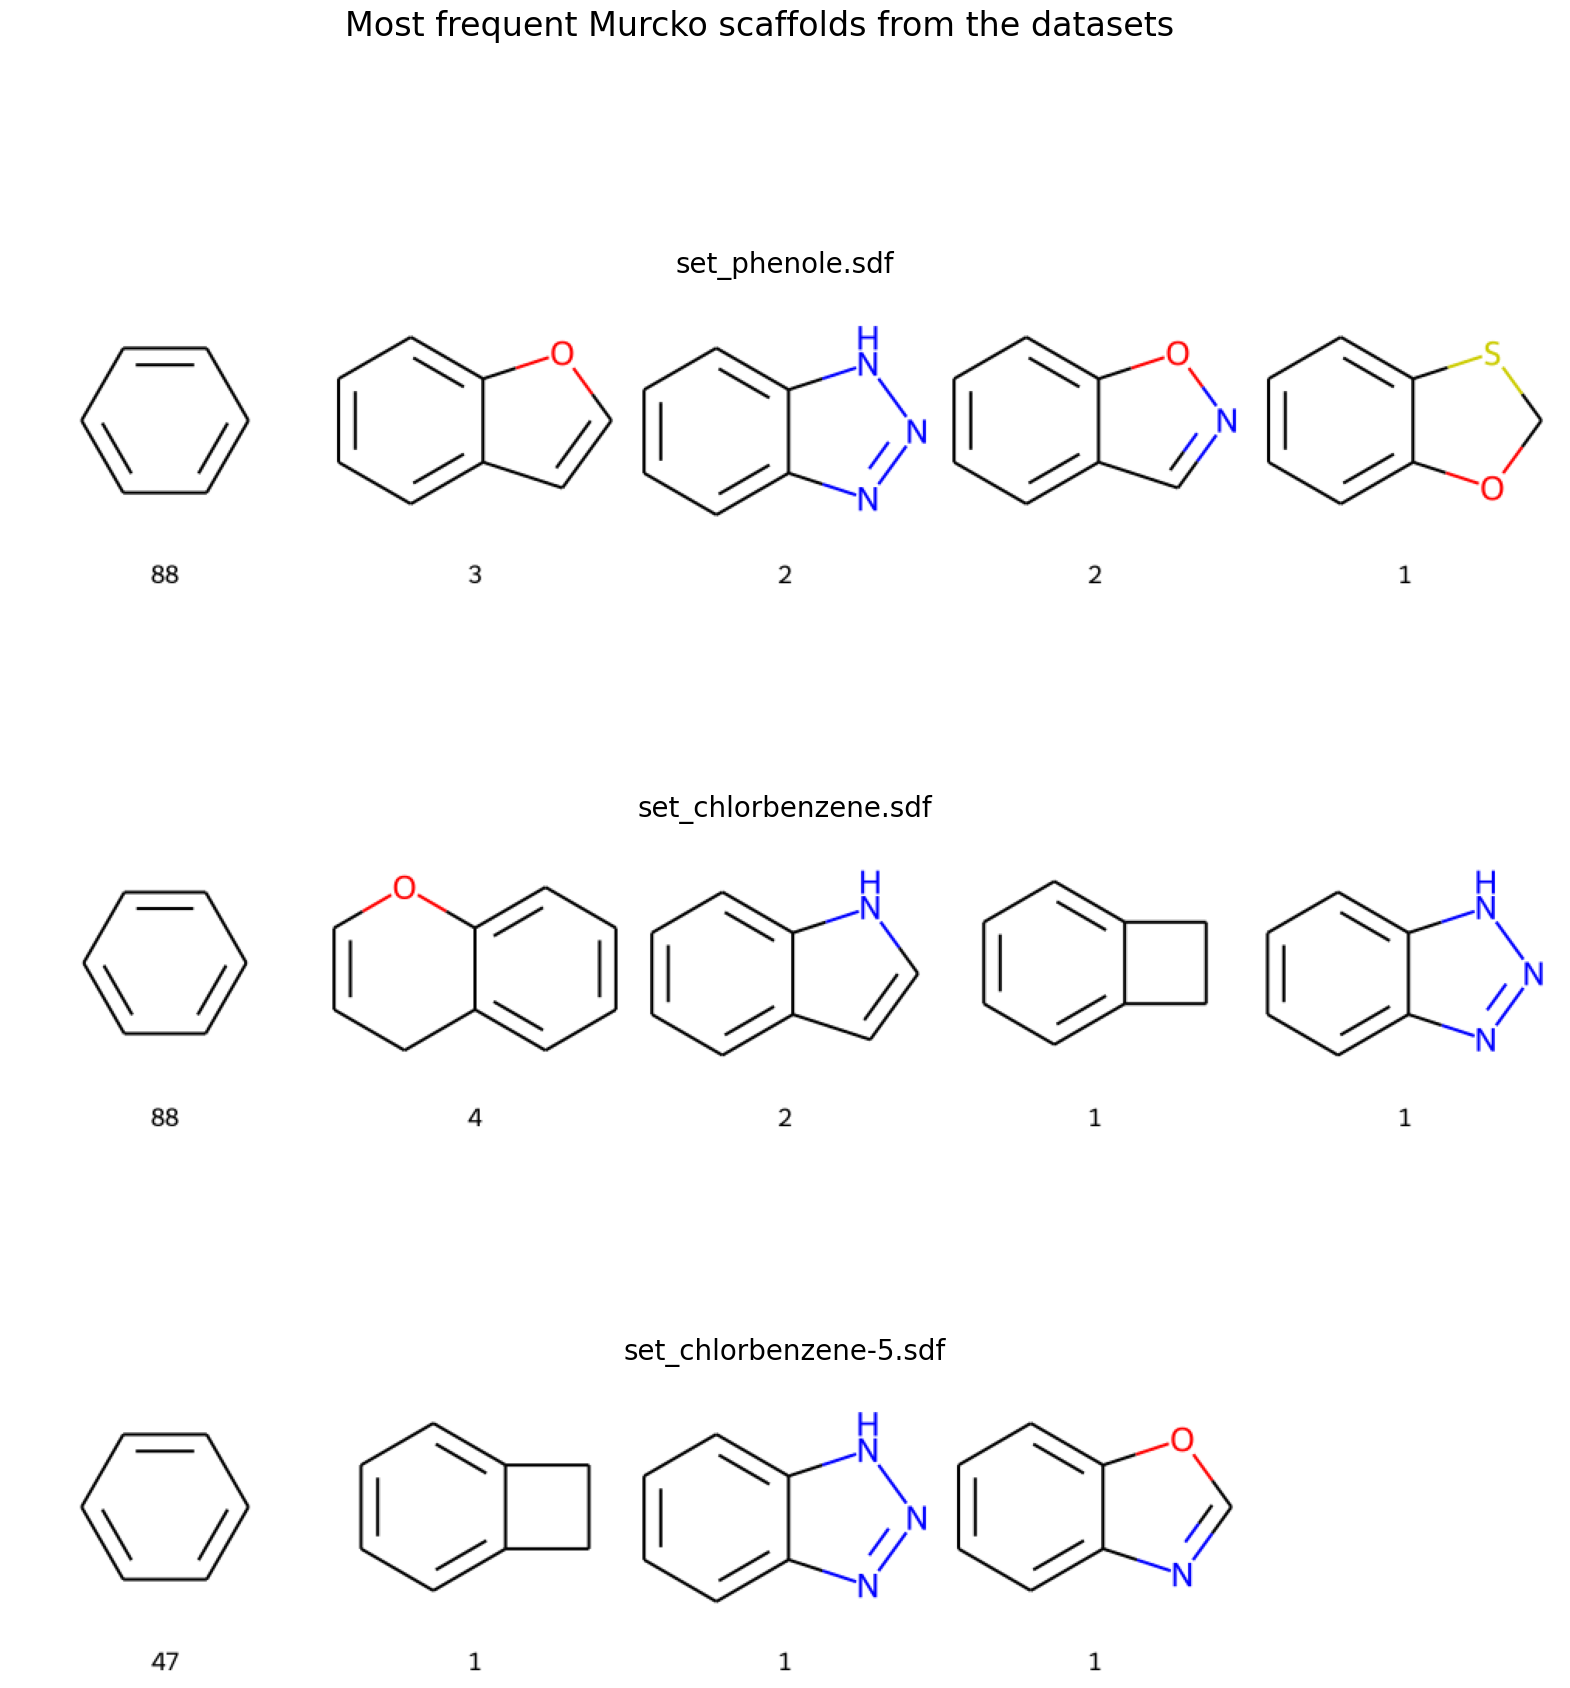

In [30]:
cider.draw_most_frequent_scaffolds(testdict, framework=True, normalize=False)

Similar to the cider.draw_molecules method the number of shown scaffolds (frameworks, skeletons) can be chosen as well as the number of images per row. When there are less scaffolds (frameworks, skeletons) in the dataset than the chosen number, the highest possible number of scaffolds (frameworks, skeletons) will be used.

INFO:root:Updated dictionary with 'scaffold_list' and 'scaffold_summary'
INFO:root:Updated dictionary with 'scaffold_grid'


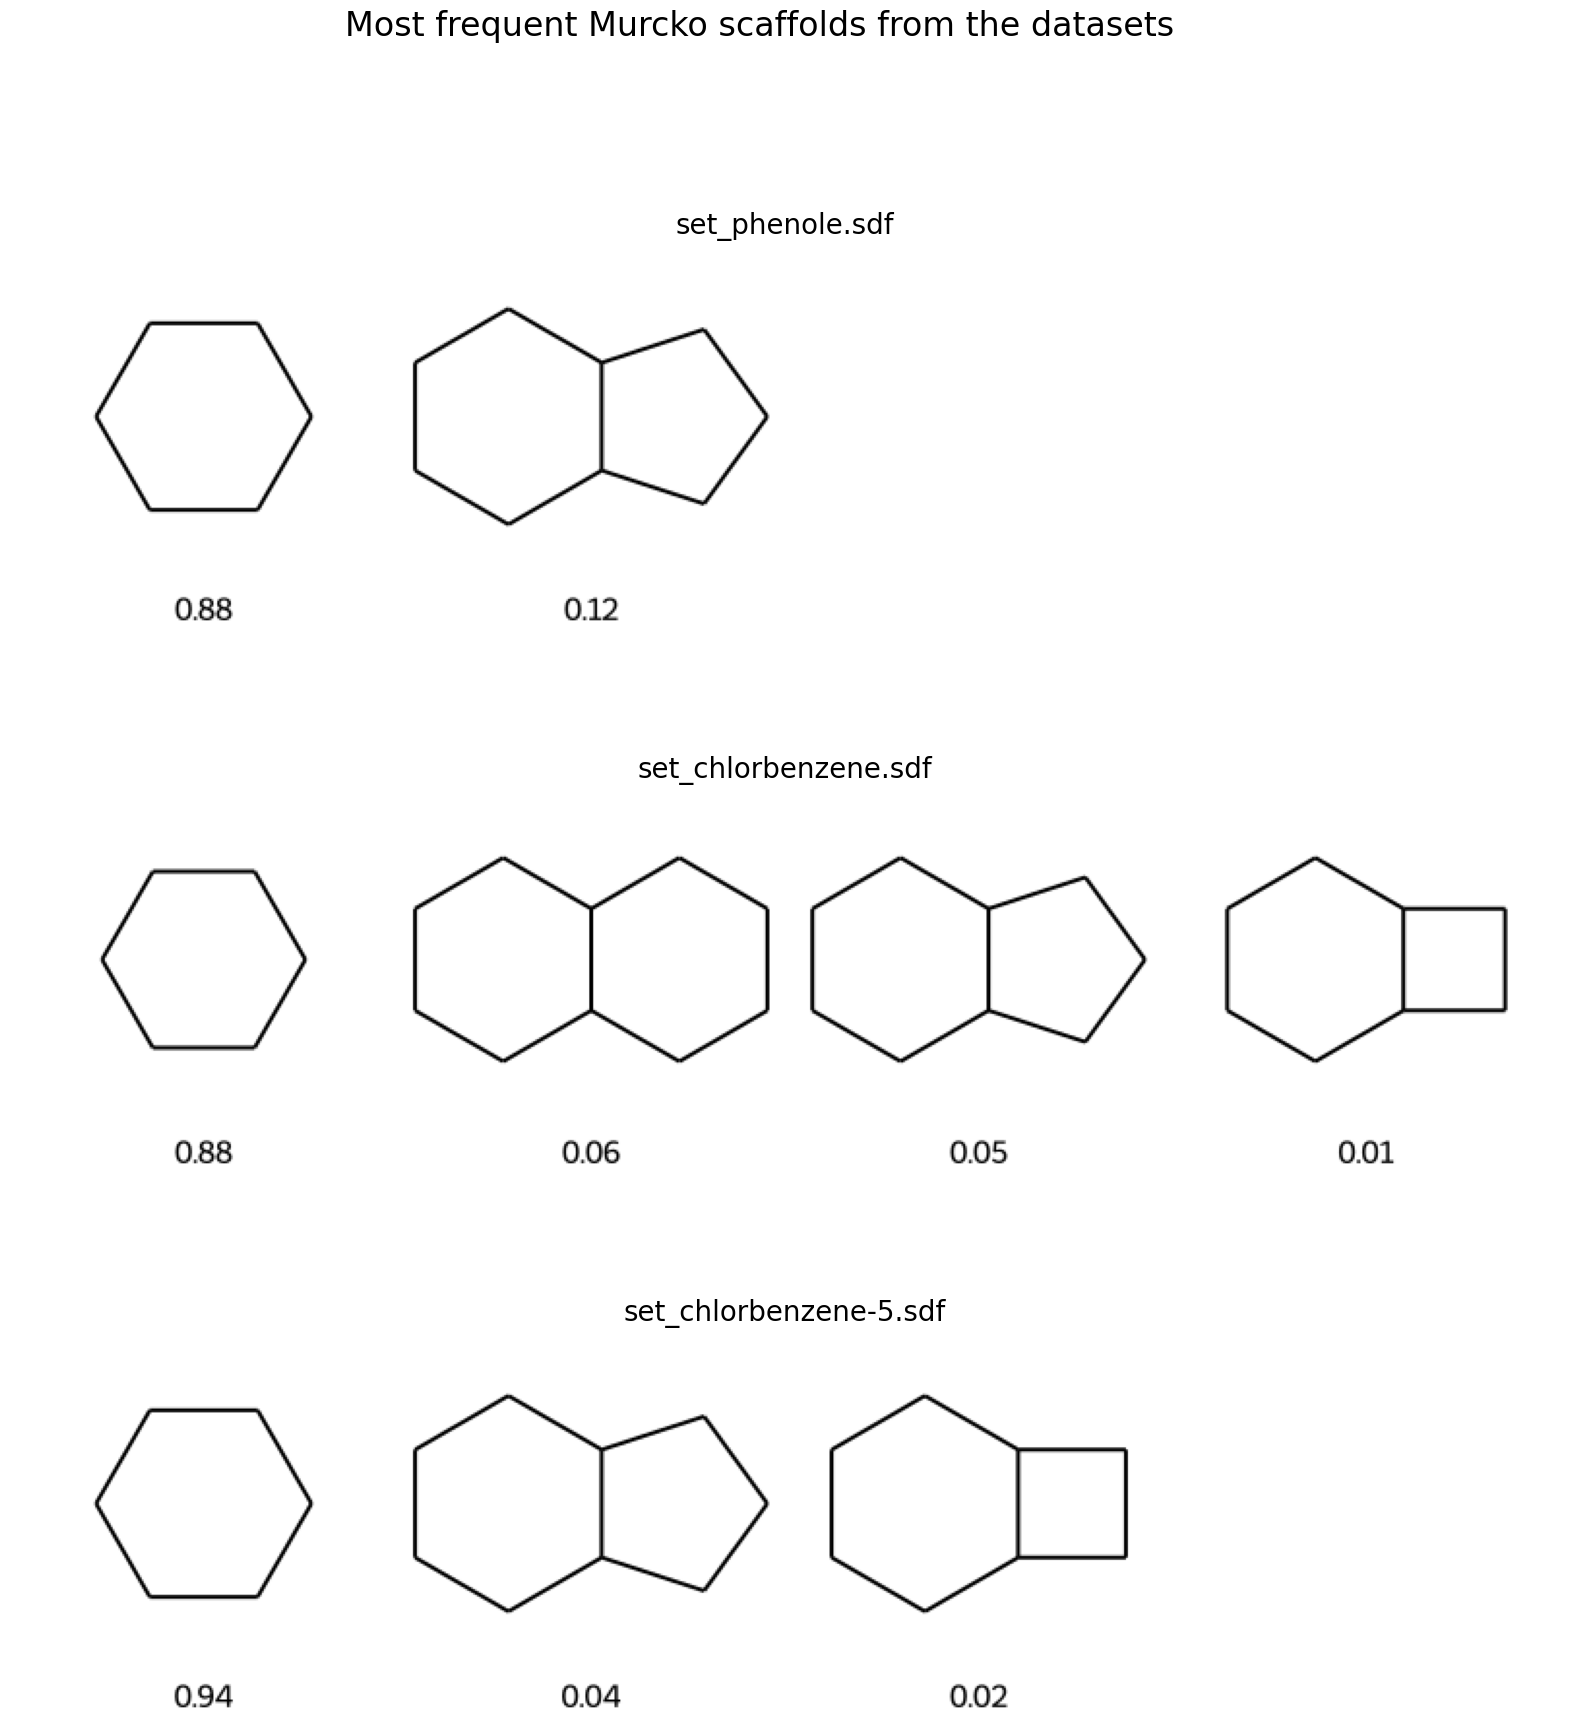

In [31]:
cider.draw_most_frequent_scaffolds(testdict, skeleton=True, number_of_structures=8, structures_per_row=4)

## Chemical Space Visualization  
Using ChemPlot the chemical space of the molecules can be visualized. Therefore, a chemical identifier is needed, but it does not matter if it is SMILES, InChI or InChIKey. ChemPlot will generate a fingerprint with a given fingerprint size (fp_bits) and radius (fp_radius). For the visualization the dimension of the chemical space needs to be reduced to two dimensions utilizing PCA, t-NSE or UMAP. Additionally, an interactive plot can be generated (will be opened in a new window).  
Please remember that t-SNE and UMAP are probabilistic technique so they might give slightly different results every time they are run.  
The default parameters are fingerprints with 2048 bits and a radius of 2, dimension reduction as PCA and interactive as True.  

In [32]:
cider.chemical_space_visualization(testdict)

The interactive plot will not be displayed in line but is opened in a new window. There it can be saved. 
Please note that to dots from the chlorbenzene-5 set (blue dots in the interactive) are superimposed with the dots from the chlorbenzene set (green dots in the interactive plot) as both of the sets contain the same molecules. Therefore the blue dots are not visible. In the interactive plot this can be noted when pointing on the dots but for the 'normal' plots this should be kept in mind.
Changing the dimension reductions shows the difference between the different methods.

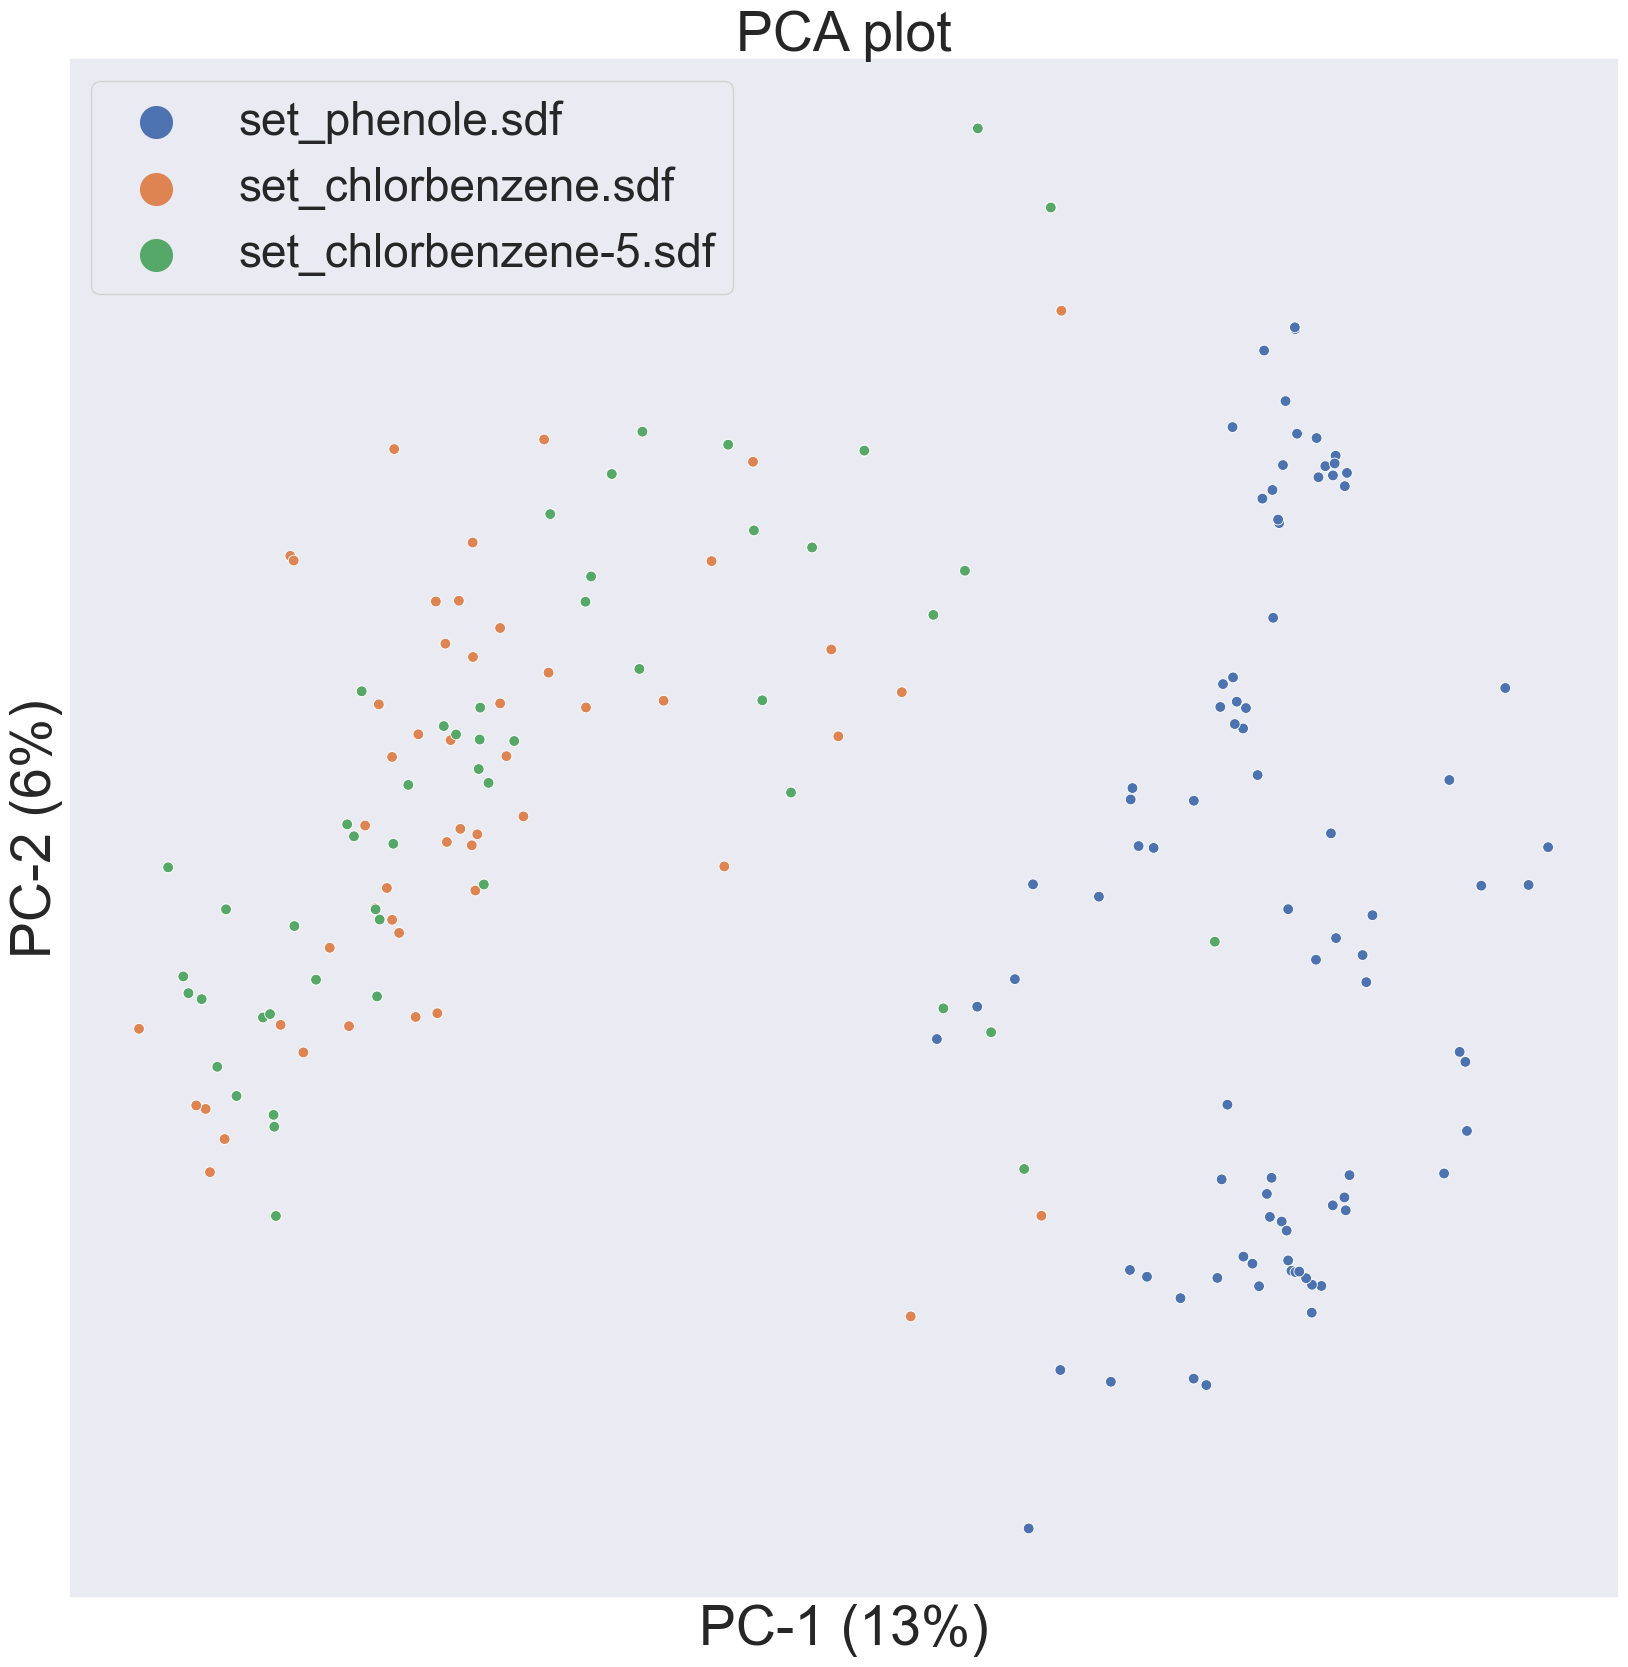

In [33]:
cider.chemical_space_visualization(testdict, dimension_reduction = 'pca', interactive = False, fp_bits = 1024, fp_radius = 2)

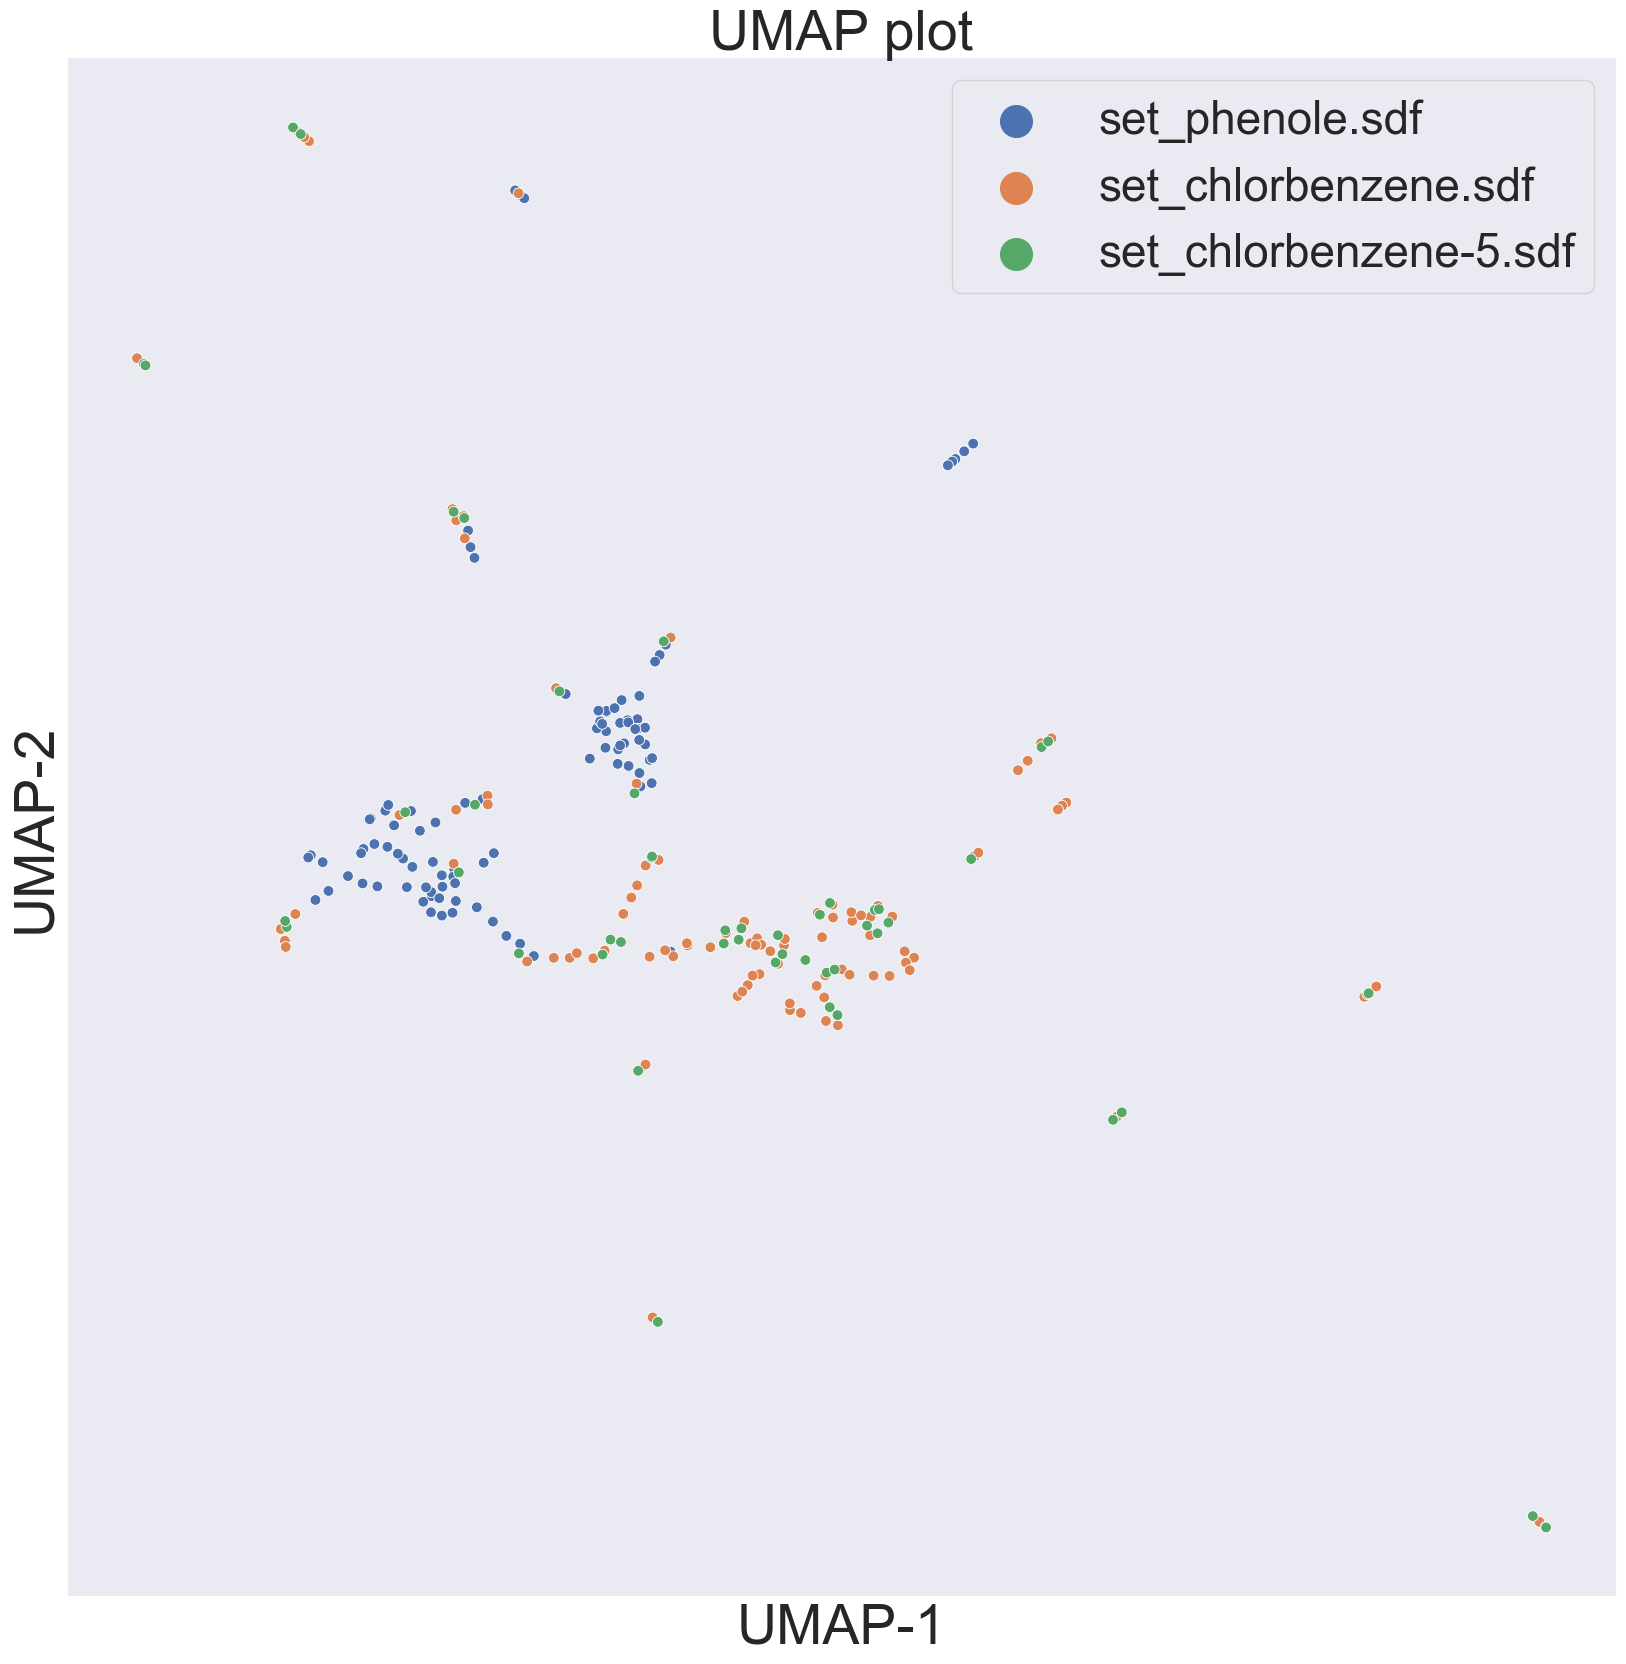

In [34]:
cider.chemical_space_visualization(testdict, dimension_reduction = 'umap', interactive = False, fp_bits = 1024, fp_radius = 2)

In [ ]:
cider.chemical_space_visualization(testdict, dimension_reduction = 'tsne', interactive = False, fp_bits = 1024, fp_radius = 2)

/Users/kohulanrajan/opt/anaconda3/envs/cider_chem/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kohulanrajan/opt/anaconda3/envs/cider_chem/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


## Export  
All the calculated descriptor values can be exported into csv files for the respective dataset. 

In [ ]:
cider.export_single_dict_values(testdict)  

All the created images can be saved into one pdf.

In [ ]:
cider.export_all_figures_pdf(testdict)